In [ ]:
import xarray as xr
import dask

In [ ]:
import ncar_jobqueue

cluster = ncar_jobqueue.NCARCluster(num_jobs=4)

/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43660 instead
  warnings.warn(


In [ ]:
cluster.scale(4)

In [ ]:
import distributed

client = distributed.Client(cluster)
client

Client Scheduler: tcp://10.12.205.27:45572 Dashboard: https://jupyterhub.ucar.edu/dav/user/dcherian/proxy/43660/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [ ]:
oisst = xr.open_mfdataset(
    "/glade/u/home/dcherian/rda/ds277.7/avhrr_v2.1/2020/*.nc", parallel=True
)

In [ ]:
oisst = oisst.squeeze()
oisst

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 309)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-11-04T12:00:00
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
    zlev     float32 0.0
Data variables:
    anom     (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ice      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    naming_authority:           gov.noaa.ncei
    cdm_data_type:              Grid
    date_modified:              2020-02-11T16:01:00Z
    date_created:               2020-02-11T16:01:00Z
    processing_level:           NOAA Level 4
    institution:                NOAA/National Centers for Environmental Infor...
    creator_url:                https://www.ncei.noaa.gov/
    creator_email:              oisst-help@noaa.gov
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        Global Change Master Directory (GCMD) Earth S...
    platform_vocabulary:        Global Change Master Directory (GCMD) Platfor...
    instrument:                 Earth Remote Sensing Instruments > Passive Re...
    instrument_vocabulary:      Global Change Master Directory (GCMD) Instrum...
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.25
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    time_coverage_start:        2020-01-01T00:00:00Z
    time_coverage_end:          2020-01-01T23:59:59Z
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    Conventions:                CF-1.6, ACDD-1.3
    history:                    Final file created using preliminary as first...
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    sensor:                     Thermometer, AVHRR
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    product_version:            Version v02r01
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    id:                         oisst-avhrr-v02r01.20200101.nc

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import cartopy.crs as ccrs


In [ ]:
oisst["lon"] = oisst.lon - 360

In [ ]:
ax.gridlines?

Signature:
ax.gridlines(
    crs=None,
    draw_labels=False,
    xlocs=None,
    ylocs=None,
    dms=False,
    x_inline=None,
    y_inline=None,
    auto_inline=True,
    xformatter=None,
    yformatter=None,
    **kwargs,
)
Docstring:
Automatically add gridlines to the axes, in the given coordinate
system, at draw time.

Parameters
----------
crs: optional
    The :class:`cartopy._crs.CRS` defining the coordinate system in
    which gridlines are drawn.
    Defaults to :class:`cartopy.crs.PlateCarree`.
draw_labels: optional
    Label gridlines like axis ticks, around the edge.
xlocs: optional
    An iterable of gridline locations or a
    :class:`matplotlib.ticker.Locator` instance which will be
    used to determine the locations of the gridlines in the
    x-coordinate of the given CRS. Defaults to None, which
    implies automatic locating of the gridlines.
ylocs: optional
    An iterable of gridline locations or a
    :class:`matplotlib.ticker.Locator` instance which will be
   

In [ ]:
import numpy as np

In [ ]:
import dcpy

'2020-07-09'

/glade/u/home/dcherian/python/dcpy/dcpy/plots.py:964: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


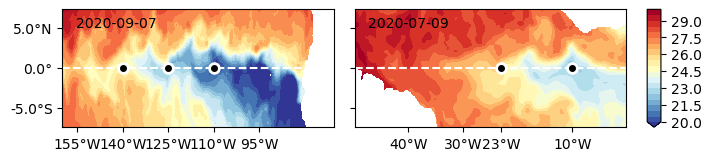

In [ ]:
subset = oisst.sst.sel(lat=slice(-7.5, 7.5))

f, axx = plt.subplots(
    1,
    2,
    sharex=False,
    sharey=True,
    constrained_layout=True,  # subplot_kw={"projection": ccrs.PlateCarree()}
)

tindex = [250, 190]

handle = subset.isel(time=tindex[0]).sel(lon=slice(-160, -70)).plot.contourf(
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    vmin=20,
    vmax=30,
    levels=21,
    ax=axx[0],
    add_labels=False,
    add_colorbar=False
    # transform=ccrs.PlateCarree(),
)

subset.isel(time=tindex[1]).sel(lon=slice(-50, 0)).plot.contourf(
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    vmin=20,
    vmax=30,
    levels=21,
    ax=axx[1],
    # transform=ccrs.PlateCarree(),
    add_colorbar=False,
    # cbar_kwargs=dict(orientation="horizontal", shrink=0.8, aspect=20),
    add_labels=False,
)

for ax, tt in zip(axx, tindex):
    ax.text(
        0.05,
        0.85,
        str(subset.time[tt].data)[:10],
        color="k",
        transform=ax.transAxes,
        fontsize="medium",
    )


f.colorbar(handle, ax=axx, aspect=40)
# for ax in axx:
#    ax.gridlines(
#        draw_labels=True,
#        xlocs=[-95, -110, -125, -140, -155],
#        ylocs=np.arange(-10, 11, 5),
#        color="w",
#    )
#    ax.coastlines(facecolor="k")


axx[0].set_xticks([-95, -110, -125, -140, -155])
axx[1].set_xticks([-10, -23, -30, -40, -50])

for ax, x in zip(axx, [[-110, -125, -140], [-23, -10]]):
    ax.plot(x, [0,]*len(x), marker='o', ms=8, ls="none", color='w', zorder=4)
    ax.plot(x, [0,]*len(x), marker='o', ms=4, ls="none", color='k', zorder=4)

[dcpy.plots.liney(0, ax=ax, zorder=2, color="w") for ax in axx]
f.set_size_inches((7, 1.5))

dcpy.plots.lat_lon_ticks(axx[0])
dcpy.plots.lat_lon_ticks(axx[1])

f.savefig("../images/cold-tongues-chipods.png", dpi=300)

In [ ]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
